# CAR PRICE MODEL

### <font color='red'>PROBLEM STATEMENT</font>
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal:
Required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

### <font color='red'>OBJECTIVE</font>
To model car prices based on available independent variables, enabling management to understand and influence pricing dynamics and business strategy

In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### <font color='red'>DATA COLLECTTION</font>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### <font color='red'>EXPLORATORY DATA ANALYSIS (EDA)</font>

#### CHECK SHAPE OF THE DATASET

In [7]:
#Shape of the data set
df.shape

(205, 26)

##### THERE ARE  205 ROWS AND 26 COLUMNS

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### IDENTIFYING NUMERICAL AND CATEGORICAL COLUMNS

In [12]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [13]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### CHECKING NULL VALUES

In [15]:
df.isnull

<bound method DataFrame.isnull of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [16]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### THERE IS NO NULL VALUES IN ANY COLUMNS

#### CHECKING FOR DUPLICATES

In [17]:
df.duplicated().sum()

0

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [19]:
df.describe(include='object').T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [20]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in car_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205], Length: 205
Unique values in symboling: [ 3  1  2  0 -1 -2], Length: 6
Unique values in CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 

#### ANALYSING NUMERICAL COLUMNS

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

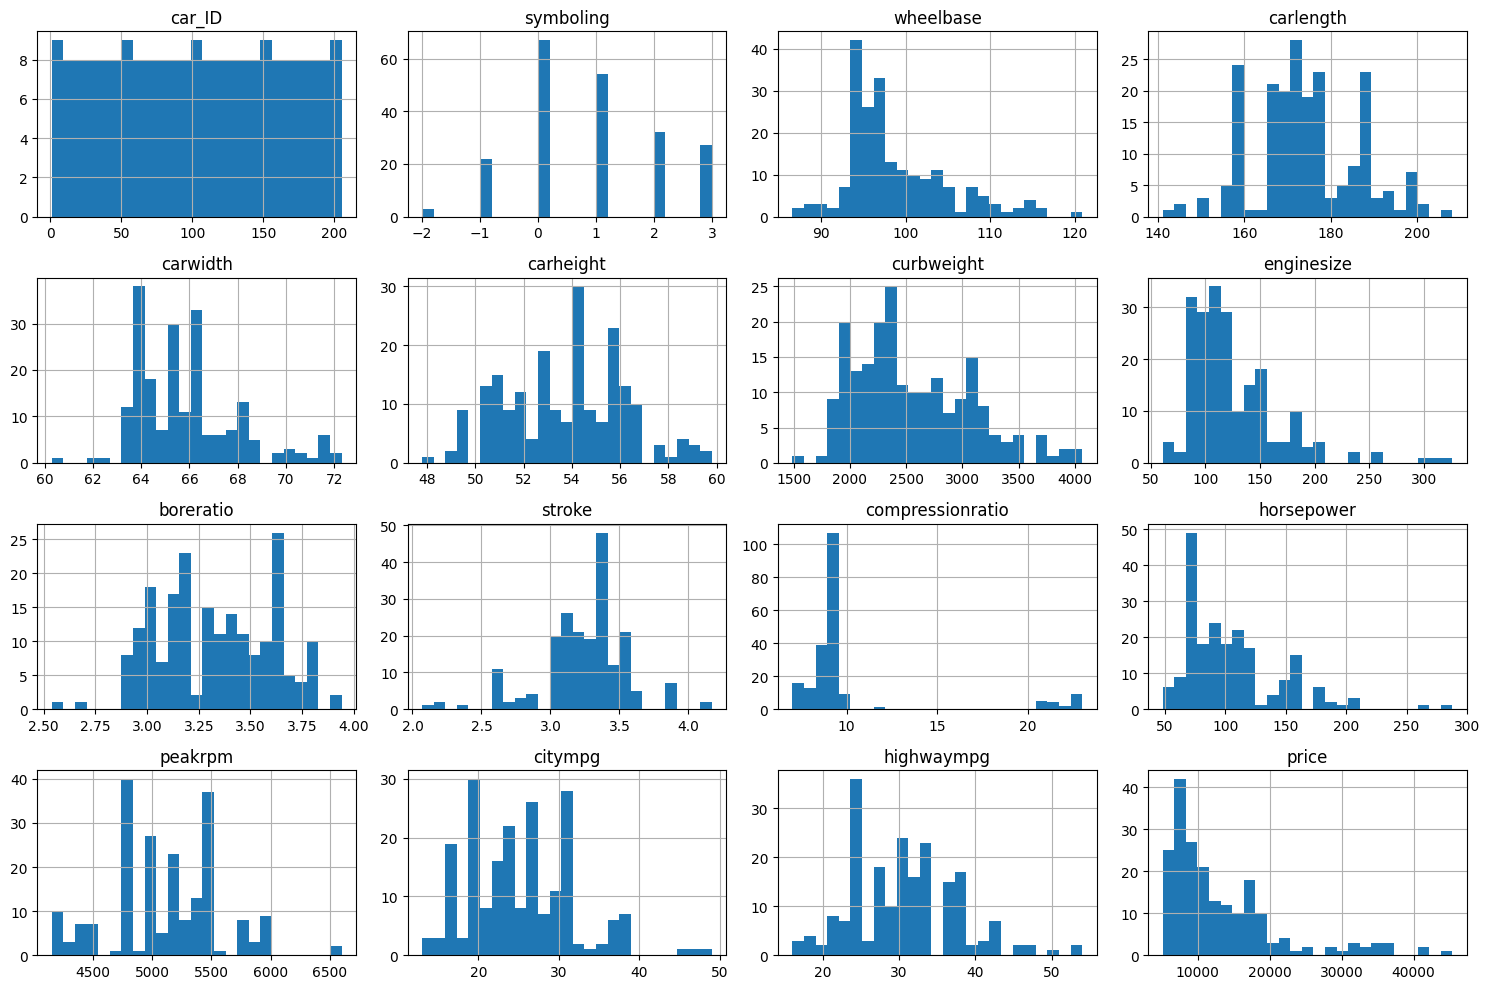

In [22]:
#Histogram for numerical columns
df[num_cols].hist(bins=25,figsize=(15,10),layout=(4,4))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

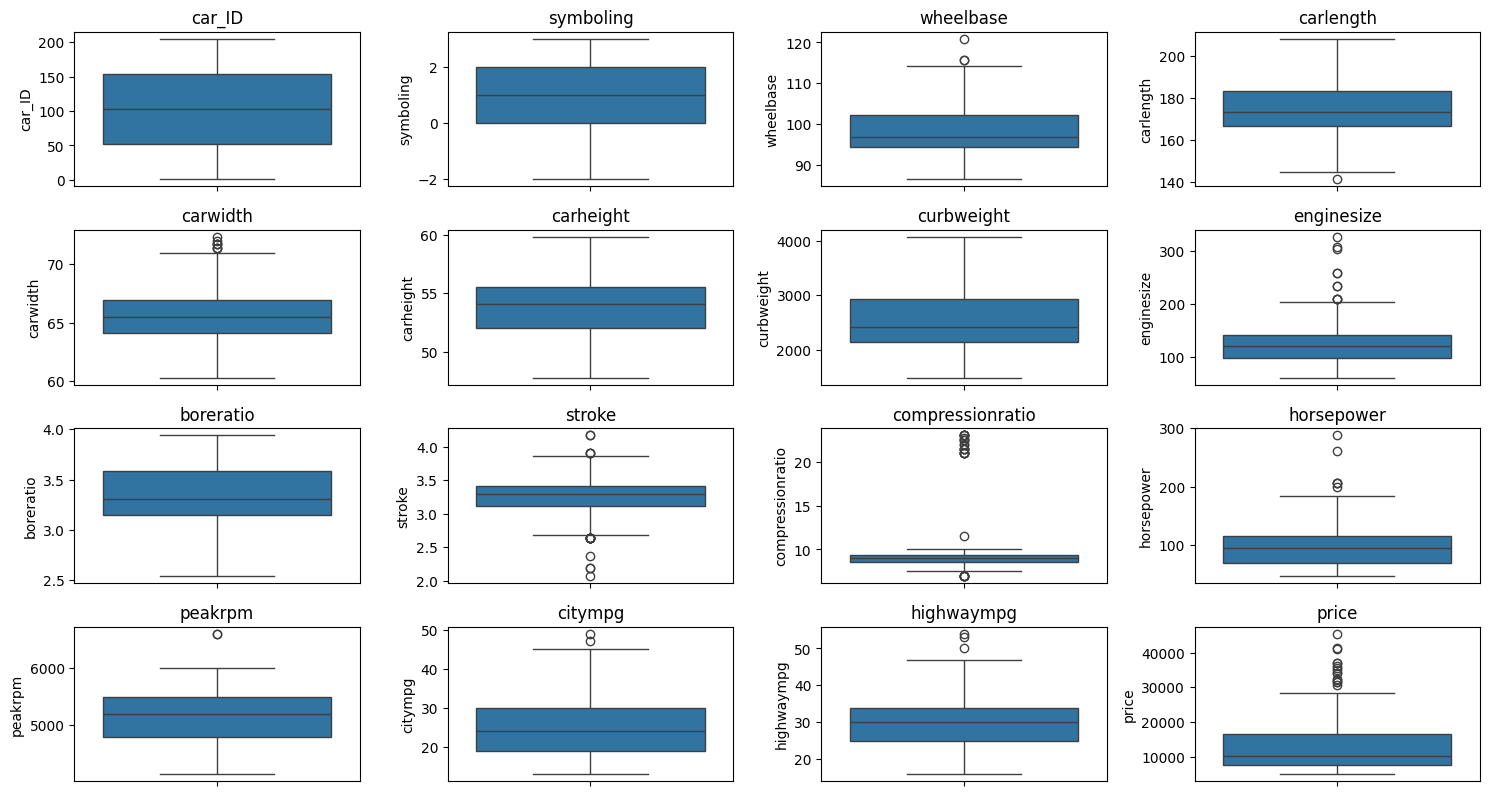

In [23]:
#Box plot to identify outliers
plt.figure(figsize=(15,10))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show

##### THE NUMERICAL COLUMNS MENTIONED BELOW CONTAINS OUTLIERS
##### WHEELBASE,CARLENGTH,CARWIDTH,ENGINESIZE,STROKE,COMPRESSIONRATIO,HORSEPOWER,PEAKRPM,CITYMPG,HIGHWAYMPG,PRICE

<function matplotlib.pyplot.show(close=None, block=None)>

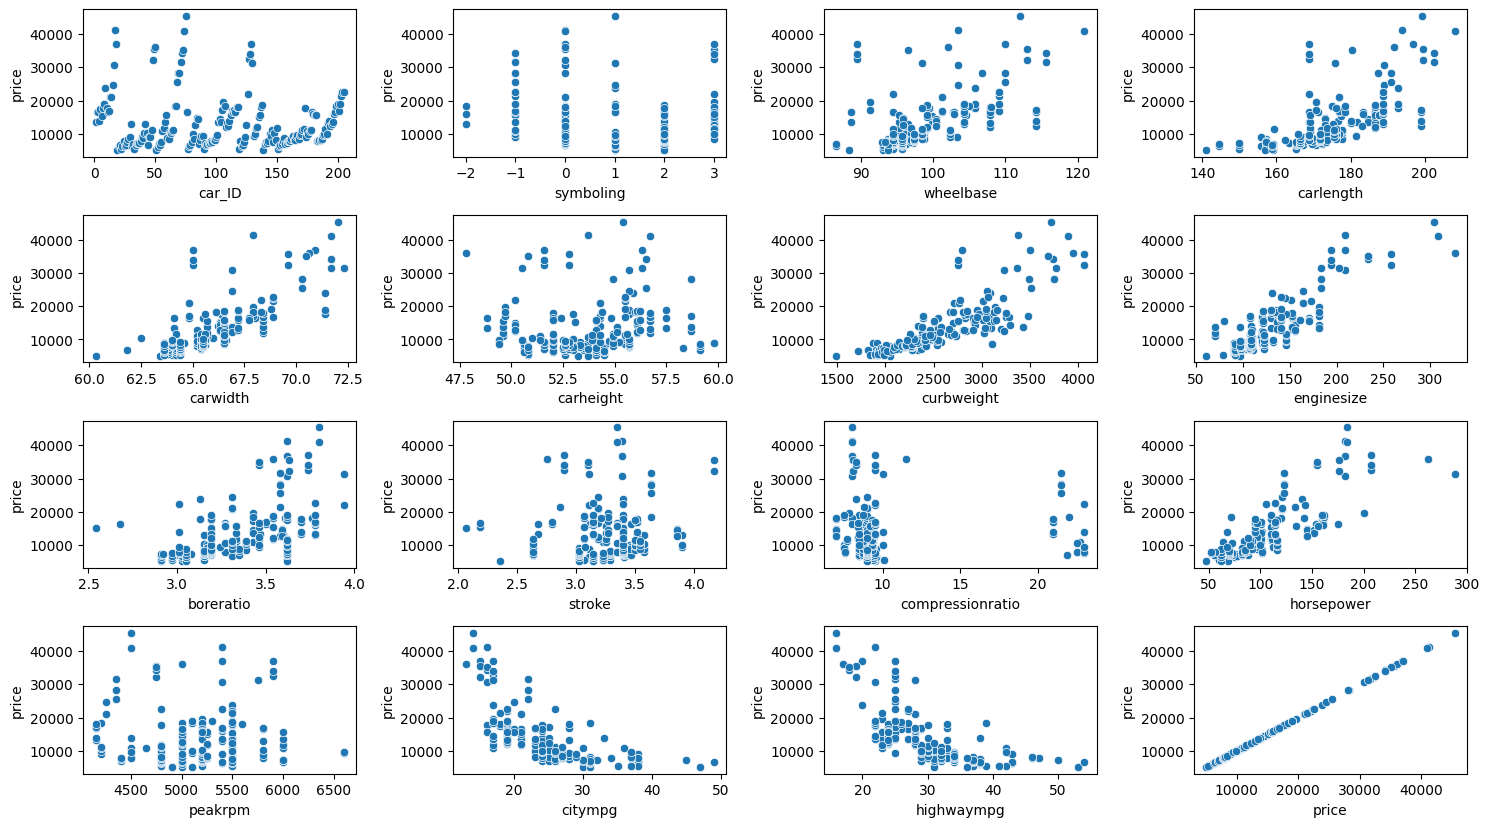

In [25]:
#Scatter plot to identify between dependentand(price) indepent features
plt.figure(figsize=(15,10))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show

#### SKEWNESS AND KURTOSIS

In [26]:
from scipy.stats import skew, kurtosis

#Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurtosis = df[num_cols].apply(kurtosis)

print("skewness \n",skewness)
print("kurtosis \n",kurtosis)

#Identify positive skew and negative skew
positive_skew = skewness[skewness > 1]
negative_skew = skewness[skewness < -1]

print("varible with positive skewness \n",positive_skew)
print("varible with negative skewness \n",negative_skew)

#Identify leptokurtic and platykurtic 
leptokurtic = kurtosis[kurtosis < 3]
platykurtic = kurtosis[kurtosis > 3]


print("leptokurtic \n",leptokurtic)
print("platykurtic \n",platykurtic)

skewness 
 car_ID              0.000000
symboling           0.209525
wheelbase           1.042514
carlength           0.154810
carwidth            0.897375
carheight           0.062660
curbweight          0.676402
enginesize          1.933375
boreratio           0.020009
stroke             -0.684648
compressionratio    2.591720
horsepower          1.395006
peakrpm             0.074608
citympg             0.658838
highwaympg          0.536038
price               1.764644
dtype: float64
kurtosis 
 car_ID             -1.200057
symboling          -0.689015
wheelbase           0.963276
carlength          -0.110013
carwidth            0.656614
carheight          -0.462188
curbweight         -0.070942
enginesize          5.148030
boreratio          -0.795151
stroke              2.092597
compressionratio    5.077161
horsepower          2.589862
peakrpm             0.055528
citympg             0.535505
highwaympg          0.400284
price               2.948598
dtype: float64
varible with positiv

#### CORRELATION


In [28]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##### OUT OF 26 COLUMNS 16 ARE NUMERICAL COLUMN AND REMAINING 10 ARE CATEGORICAL COLUMN

#### CHECKING NULL VALUES

In [29]:
df.isnull

<bound method DataFrame.isnull of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [30]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### CHECKING FOR DUPLICATES

In [31]:
df.duplicated().sum()

0

##### THERE ARE NO DUPLICATE VALUES

#### UNDERSTANDING DISTRIBUTION OF DATA

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [33]:
df.describe(include='object').T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [34]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in car_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205], Length: 205
Unique values in symboling: [ 3  1  2  0 -1 -2], Length: 6
Unique values in CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 

#### ANALYSING NUMERICAL COLUMNS

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

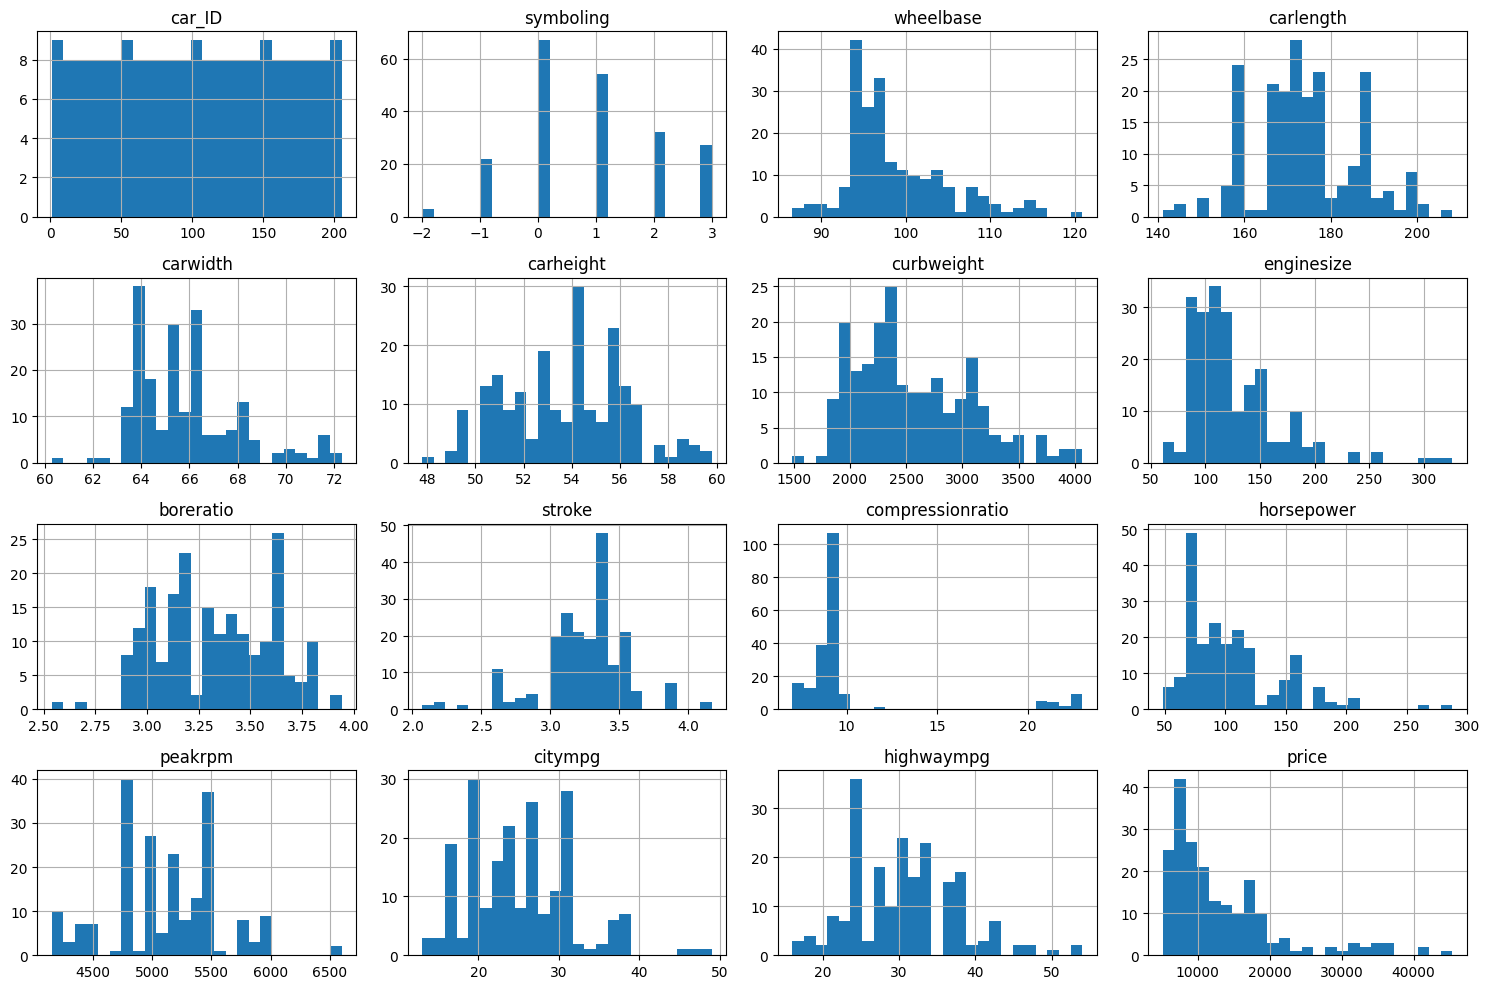

In [36]:
#Histogram for numerical columns
df[num_cols].hist(bins=25,figsize=(15,10),layout=(4,4))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

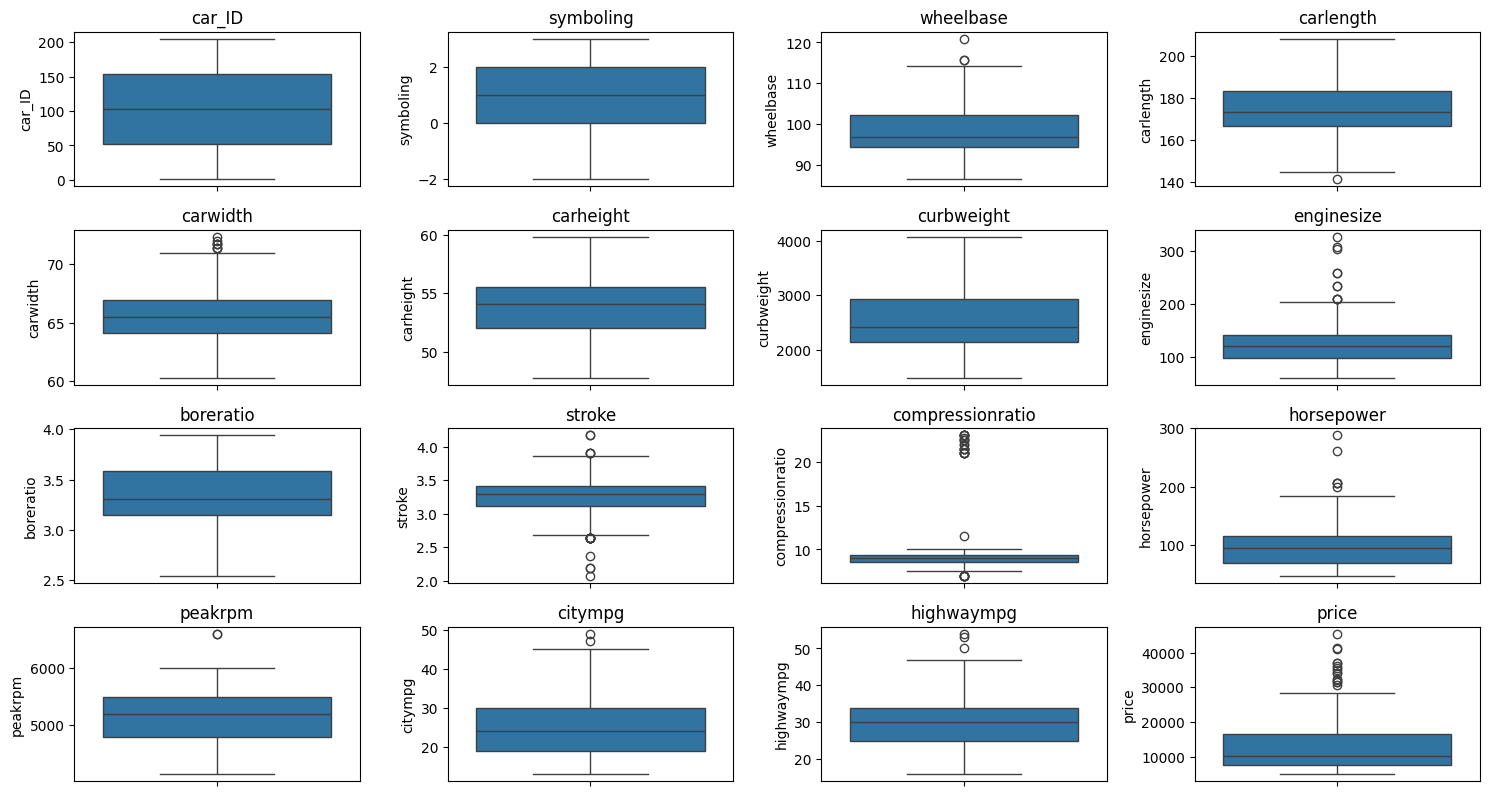

In [37]:
#Box plot to identify outliers
plt.figure(figsize=(15,10))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show

##### THE NUMERICAL COLUMNS MENTIONED BELOW CONTAINS OUTLIERS
##### WHEELBASE,CARLENGTH,CARWIDTH,ENGINESIZE,STROKE,COMPRESSIONRATIO,HORSEPOWER,PEAKRPM,CITYMPG,HIGHWAYMPG,PRICE

<function matplotlib.pyplot.show(close=None, block=None)>

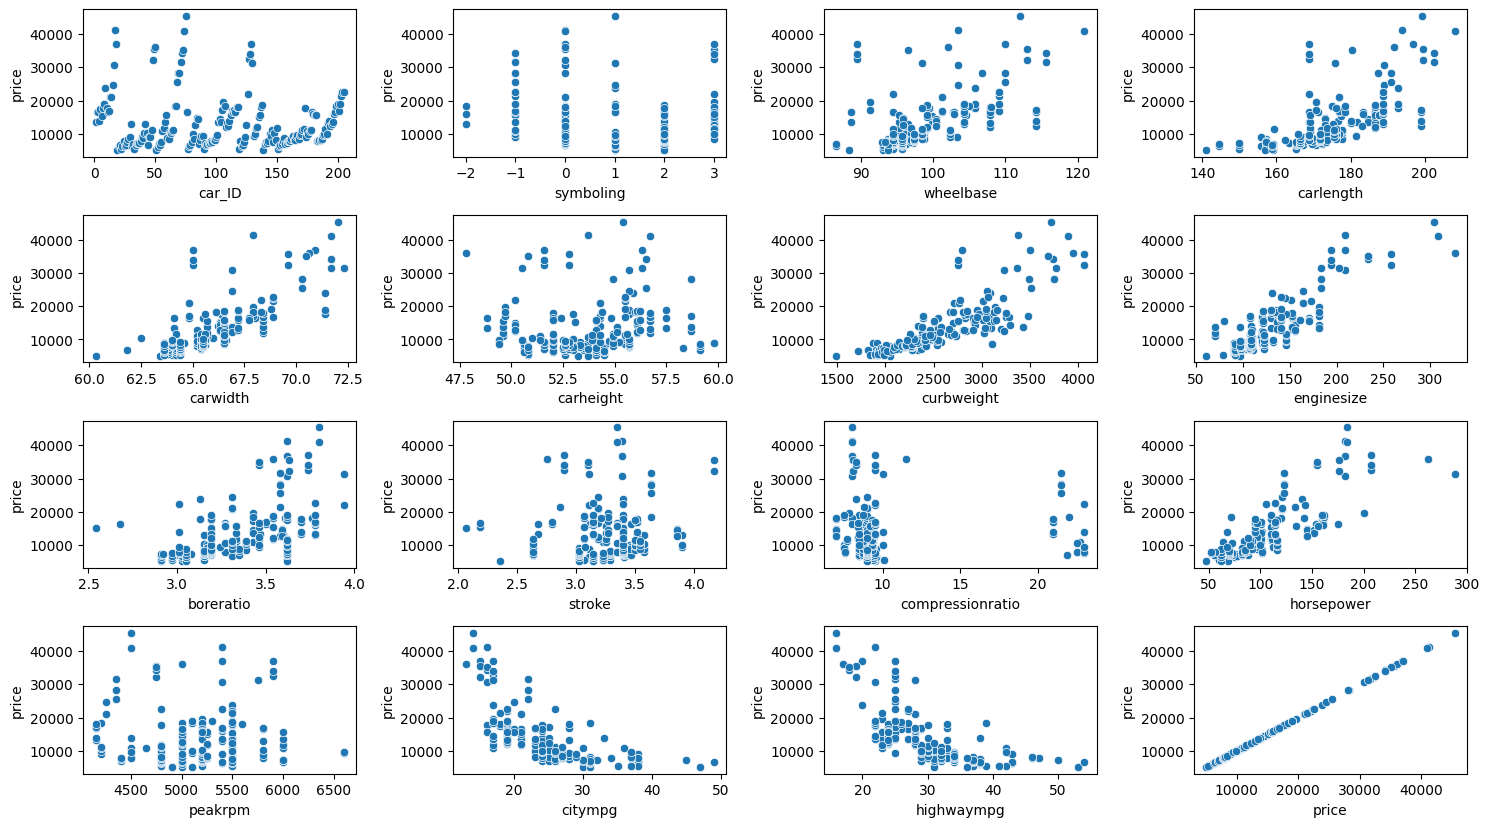

In [38]:
#Scatter plot to identify between dependentand(price) indepent features
plt.figure(figsize=(15,10))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show

#### SKEWNESS AND KURTOSIS

In [39]:
from scipy.stats import skew, kurtosis

#Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurtosis = df[num_cols].apply(kurtosis)

print("skewness \n",skewness)
print("kurtosis \n",kurtosis)

#Identify positive skew and negative skew
positive_skew = skewness[skewness > 1]
negative_skew = skewness[skewness < -1]

print("varible with positive skewness \n",positive_skew)
print("varible with negative skewness \n",negative_skew)

#Identify leptokurtic and platykurtic 
leptokurtic = kurtosis[kurtosis < 3]
platykurtic = kurtosis[kurtosis > 3]


print("leptokurtic \n",leptokurtic)
print("platykurtic \n",platykurtic)

skewness 
 car_ID              0.000000
symboling           0.209525
wheelbase           1.042514
carlength           0.154810
carwidth            0.897375
carheight           0.062660
curbweight          0.676402
enginesize          1.933375
boreratio           0.020009
stroke             -0.684648
compressionratio    2.591720
horsepower          1.395006
peakrpm             0.074608
citympg             0.658838
highwaympg          0.536038
price               1.764644
dtype: float64
kurtosis 
 car_ID             -1.200057
symboling          -0.689015
wheelbase           0.963276
carlength          -0.110013
carwidth            0.656614
carheight          -0.462188
curbweight         -0.070942
enginesize          5.148030
boreratio          -0.795151
stroke              2.092597
compressionratio    5.077161
horsepower          2.589862
peakrpm             0.055528
citympg             0.535505
highwaympg          0.400284
price               2.948598
dtype: float64
varible with positiv

#### CORRELATION


<Axes: >

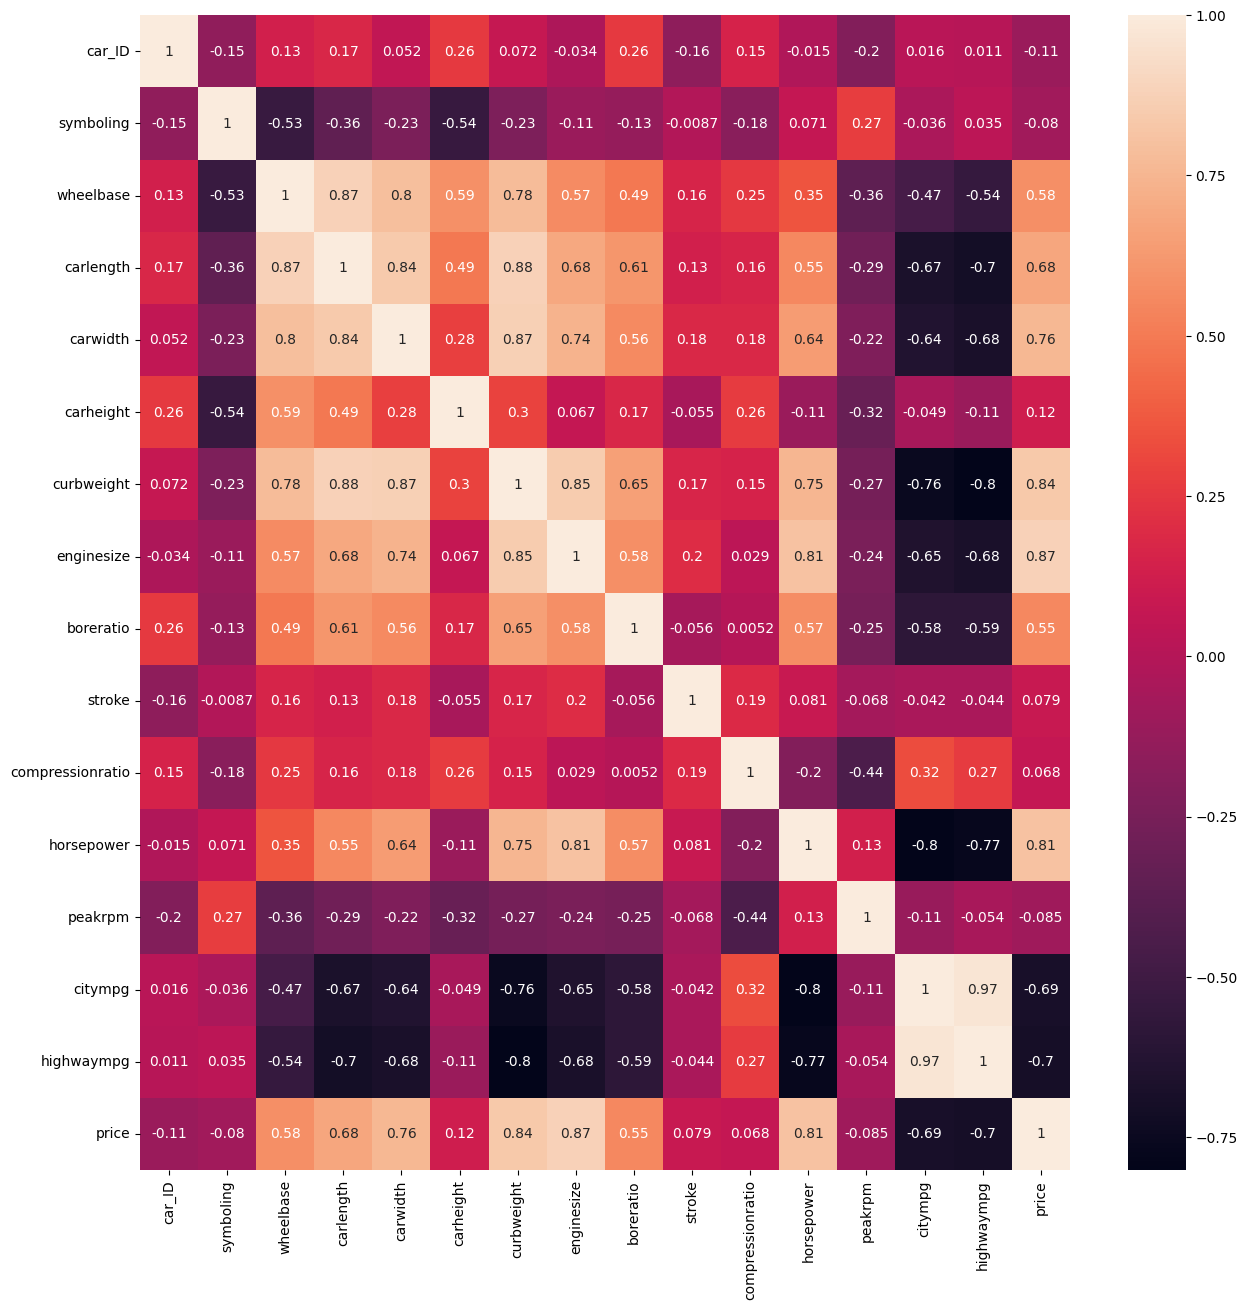

In [41]:
#Correlation with the heat map to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)

##### COLUMNS WHICH ARE HIGHLY CORRELATED WITH PRICE
- HORSEPOWER
- BORERATIO
- ENGINESIZE
- CURBWEIGHT
- CARWIDTH
- CARLENGTH
- WHEELBASE

##### COLUMNS WHICH SHOWS MULTICOLLINEARITY
- WHEELBASE AND CARLENGTH
- CARWIDTH AND CARLENGTH
- CURBWEIGHT AND CARLENGTH
- CURBWEIGHT AND CARWIDTH
- CURBWEIGHT AND ENGINESIZE
- HORSEPOWER AND ENGINESIZE
- HIGHWAYMPG AND CITYMPG

<Axes: xlabel='highwaympg', ylabel='citympg'>

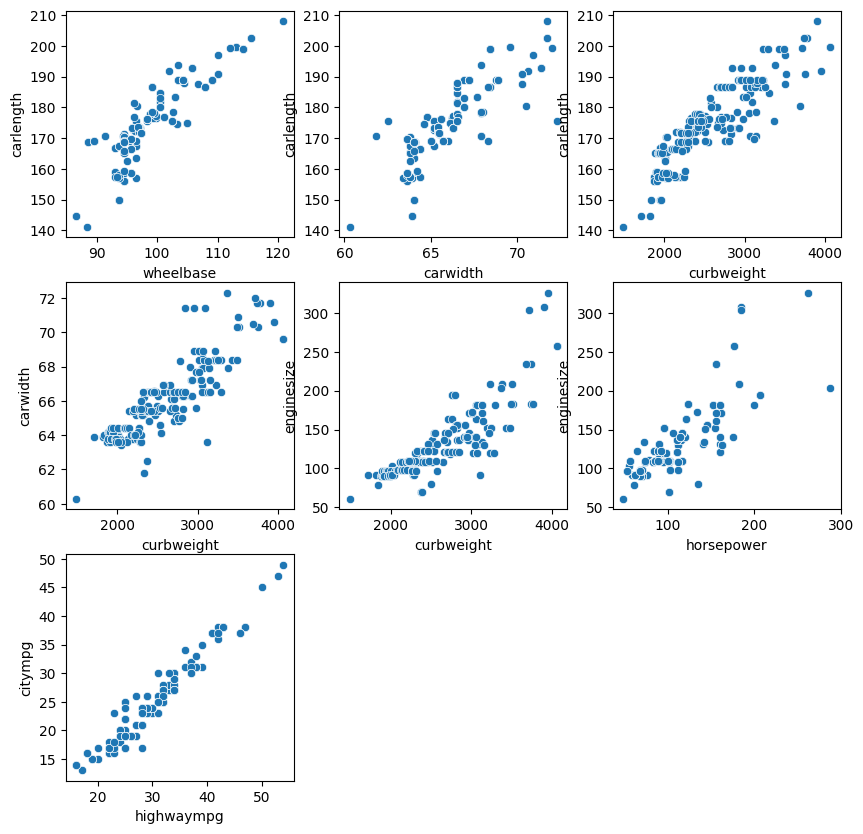

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.scatterplot(data=df,x="wheelbase",y="carlength")

plt.subplot(3,3,2)
sns.scatterplot(data=df,x="carwidth",y="carlength")

plt.subplot(3,3,3)
sns.scatterplot(data=df,x="curbweight",y="carlength")

plt.subplot(3,3,4)
sns.scatterplot(data=df,x="curbweight",y="carwidth")

plt.subplot(3,3,5)
sns.scatterplot(data=df,x="curbweight",y="enginesize")

plt.subplot(3,3,6)
sns.scatterplot(data=df,x="horsepower",y="enginesize")

plt.subplot(3,3,7)
sns.scatterplot(data=df,x="highwaympg",y="citympg")


#### ANALYSING CATEGORICAL COLUMNS

In [44]:
for column in cat_cols:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick s

##### UNIQUE VALUES IN EACH COLUMN
- The CarName column contains 147 unique values.
- The Fuel Type column contains 2 unique values.
- The Aspiration column contains 2 unique values.
- The Door Number column contains 2 unique values.
- The Car Body column contains 5 unique values.
- The Drive Wheel column contains 3 unique values.
- The Engine Location column contains 2 unique values.
- The Engine Type column contains 7 unique values.
- The Cylinder Number column contains 7 unique values.
- The Fuel System column contains 8 unique values.

In [46]:
# Cross-tabulation for Price with Fuel System
pd.crosstab(df["price"], df["fuelsystem"], margins=True)


fuelsystem,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,All
price,,,,,,,,,
5118.0,0,1,0,0,0,0,0,0,1
5151.0,0,1,0,0,0,0,0,0,1
5195.0,0,1,0,0,0,0,0,0,1
5348.0,0,1,0,0,0,0,0,0,1
5389.0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
37028.0,0,0,0,0,0,1,0,0,1
40960.0,0,0,0,0,0,1,0,0,1
41315.0,0,0,0,0,0,1,0,0,1


In [47]:
# Cross-tabulation for Price with Aspiration
pd.crosstab(df["price"], df["aspiration"], margins=True)

aspiration,std,turbo,All
price,,,
5118.0,1,0,1
5151.0,1,0,1
5195.0,1,0,1
5348.0,1,0,1
5389.0,1,0,1
...,...,...,...
37028.0,1,0,1
40960.0,1,0,1
41315.0,1,0,1


In [48]:
# Cross-tabulation for Price with Cylinder Number
pd.crosstab(df["price"], df["cylindernumber"], margins=True)

cylindernumber,eight,five,four,six,three,twelve,two,All
price,,,,,,,,
5118.0,0,0,1,0,0,0,0,1
5151.0,0,0,0,0,1,0,0,1
5195.0,0,0,1,0,0,0,0,1
5348.0,0,0,1,0,0,0,0,1
5389.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
37028.0,0,0,0,1,0,0,0,1
40960.0,1,0,0,0,0,0,0,1
41315.0,0,0,0,1,0,0,0,1


In [49]:
# Cross-tabulation for Price with Engine Type
pd.crosstab(df["price"], df["enginetype"], margins=True)

enginetype,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,All
price,,,,,,,,
5118.0,0,0,0,0,1,0,0,1
5151.0,0,0,1,0,0,0,0,1
5195.0,0,0,0,1,0,0,0,1
5348.0,0,0,0,1,0,0,0,1
5389.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
37028.0,0,0,0,0,1,0,0,1
40960.0,0,0,0,0,0,1,0,1
41315.0,0,0,0,1,0,0,0,1


In [50]:
# Cross-tabulation for Price with Engine Location
pd.crosstab(df["price"], df["enginelocation"], margins=True)

enginelocation,front,rear,All
price,,,
5118.0,1,0,1
5151.0,1,0,1
5195.0,1,0,1
5348.0,1,0,1
5389.0,1,0,1
...,...,...,...
37028.0,0,1,1
40960.0,1,0,1
41315.0,1,0,1


In [51]:
# Cross-tabulation for Price with Drive Wheel
pd.crosstab(df["price"], df["drivewheel"], margins=True)

drivewheel,4wd,fwd,rwd,All
price,,,,
5118.0,0,1,0,1
5151.0,0,1,0,1
5195.0,0,1,0,1
5348.0,0,1,0,1
5389.0,0,1,0,1
...,...,...,...,...
37028.0,0,0,1,1
40960.0,0,0,1,1
41315.0,0,0,1,1


In [52]:
# Cross-tabulation for Price with Car Body
pd.crosstab(df["price"], df["carbody"], margins=True)

carbody,convertible,hardtop,hatchback,sedan,wagon,All
price,,,,,,
5118.0,0,0,1,0,0,1
5151.0,0,0,1,0,0,1
5195.0,0,0,1,0,0,1
5348.0,0,0,1,0,0,1
5389.0,0,0,1,0,0,1
...,...,...,...,...,...,...
37028.0,1,0,0,0,0,1
40960.0,0,0,0,1,0,1
41315.0,0,0,0,1,0,1


In [53]:
# Cross-tabulation for Price with Door Number
pd.crosstab(df["price"], df["doornumber"], margins=True)

doornumber,four,two,All
price,,,
5118.0,0,1,1
5151.0,0,1,1
5195.0,0,1,1
5348.0,0,1,1
5389.0,0,1,1
...,...,...,...
37028.0,0,1,1
40960.0,1,0,1
41315.0,0,1,1


In [54]:
# Cross-tabulation for Price with Fuel Type
pd.crosstab(df["price"], df["fueltype"], margins=True)

fueltype,diesel,gas,All
price,,,
5118.0,0,1,1
5151.0,0,1,1
5195.0,0,1,1
5348.0,0,1,1
5389.0,0,1,1
...,...,...,...
37028.0,0,1,1
40960.0,0,1,1
41315.0,0,1,1


### <font color='red'>DATA PREPROCESSING</font>

In [55]:
df1=df.copy()
df1.shape

(205, 26)

#### REMOVE UNNECESSARY COLUMN

##### REMOVE COLUMN WITH MULTICOLLINEARITY

In [56]:
df1.drop(["carlength","curbweight","enginesize","highwaympg","wheelbase"],axis=1,inplace=True)
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,...,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,64.1,...,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,64.1,...,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,65.5,...,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,66.2,...,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,66.4,...,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,68.9,...,ohc,four,mpfi,3.78,3.15,9.5,114,5400,23,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,68.8,...,ohc,four,mpfi,3.78,3.15,8.7,160,5300,19,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,68.9,...,ohcv,six,mpfi,3.58,2.87,8.8,134,5500,18,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,68.9,...,ohc,six,idi,3.01,3.40,23.0,106,4800,26,22470.0


In [57]:
df1.shape

(205, 21)

##### COLUMNS DO NOT CARRY USEFUL INFORMATION

In [58]:
#Droping the column car_ID,CarName
df1.drop(["car_ID","CarName"],axis=1,inplace=True)
df1.shape

(205, 19)

In [59]:
num_cols1=df1.select_dtypes(include='number').columns
num_cols1

Index(['symboling', 'carwidth', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

#### HANDLING OUTLIER

In [60]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw
    

In [61]:
for i in df1.select_dtypes(include="number").columns:
    lw,uw=whisker(df1[i])
    df1[i]=np.where(df1[i]<lw,lw,df1[i])
    df1[i]=np.where(df1[i]>uw,uw,df1[i]) 

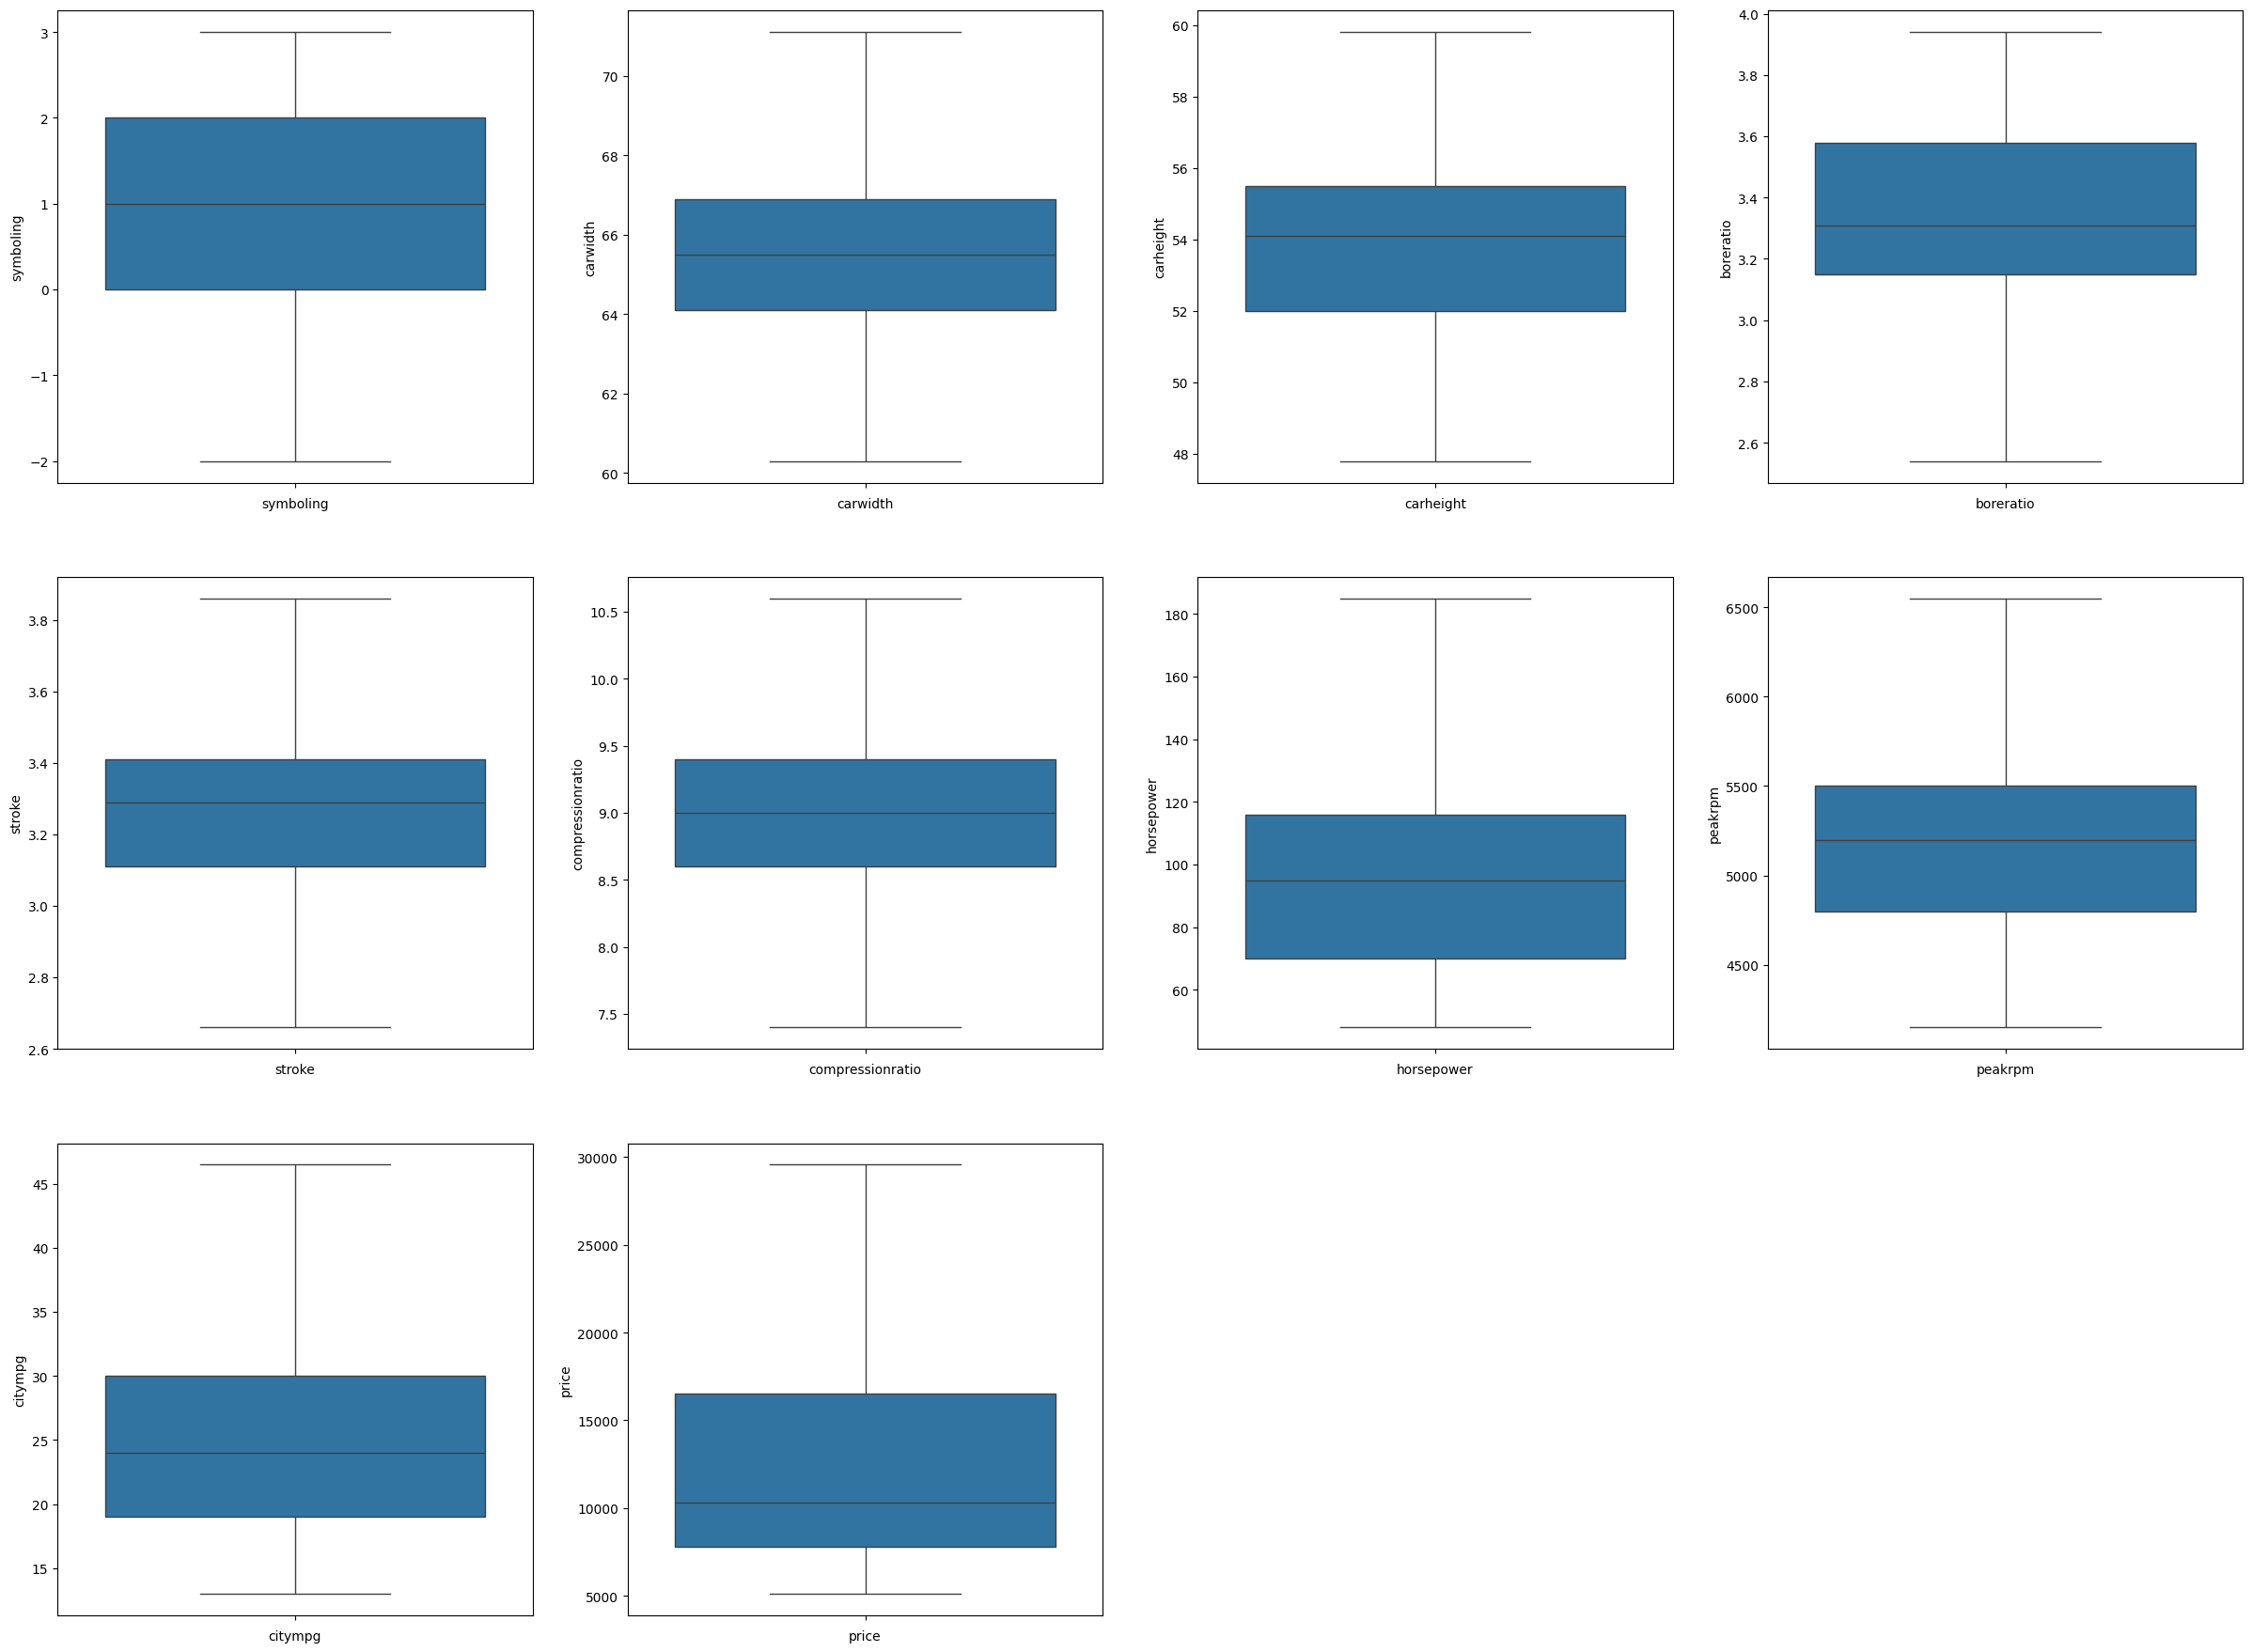

In [63]:

#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

#### RECHECK THE SKEWNESS AND KURTOSIS

In [64]:
from scipy.stats import skew, kurtosis

#Calculate skewness and kurtosis
skewness = df1[num_cols1].apply(skew)
kurtosis = df1[num_cols1].apply(kurtosis)

print("skewness \n",skewness)
print("kurtosis \n",kurtosis)

#Identify positive skew and negative skew
positive_skew = skewness[skewness > 1]
negative_skew = skewness[skewness < -1]

print("varible with positive skewness \n",positive_skew)
print("varible with negative skewness \n",negative_skew)

#Identify leptokurtic and platykurtic 
leptokurtic = kurtosis[kurtosis < 3]
platykurtic = kurtosis[kurtosis > 3]


print("leptokurtic \n",leptokurtic)
print("platykurtic \n",platykurtic)

skewness 
 symboling           0.209525
carwidth            0.770586
carheight           0.062660
boreratio           0.020009
stroke             -0.376351
compressionratio    0.034891
horsepower          0.808981
peakrpm             0.049569
citympg             0.600161
price               1.213071
dtype: float64
kurtosis 
 symboling          -0.689015
carwidth            0.272895
carheight          -0.462188
boreratio          -0.795151
stroke              0.270002
compressionratio    0.092680
horsepower         -0.289955
peakrpm            -0.023244
citympg             0.278575
price               0.644283
dtype: float64
varible with positive skewness 
 price    1.213071
dtype: float64
varible with negative skewness 
 Series([], dtype: float64)
leptokurtic 
 symboling          -0.689015
carwidth            0.272895
carheight          -0.462188
boreratio          -0.795151
stroke              0.270002
compressionratio    0.092680
horsepower         -0.289955
peakrpm            -0.023

### <font color='red'>VISUALIZATION</font>

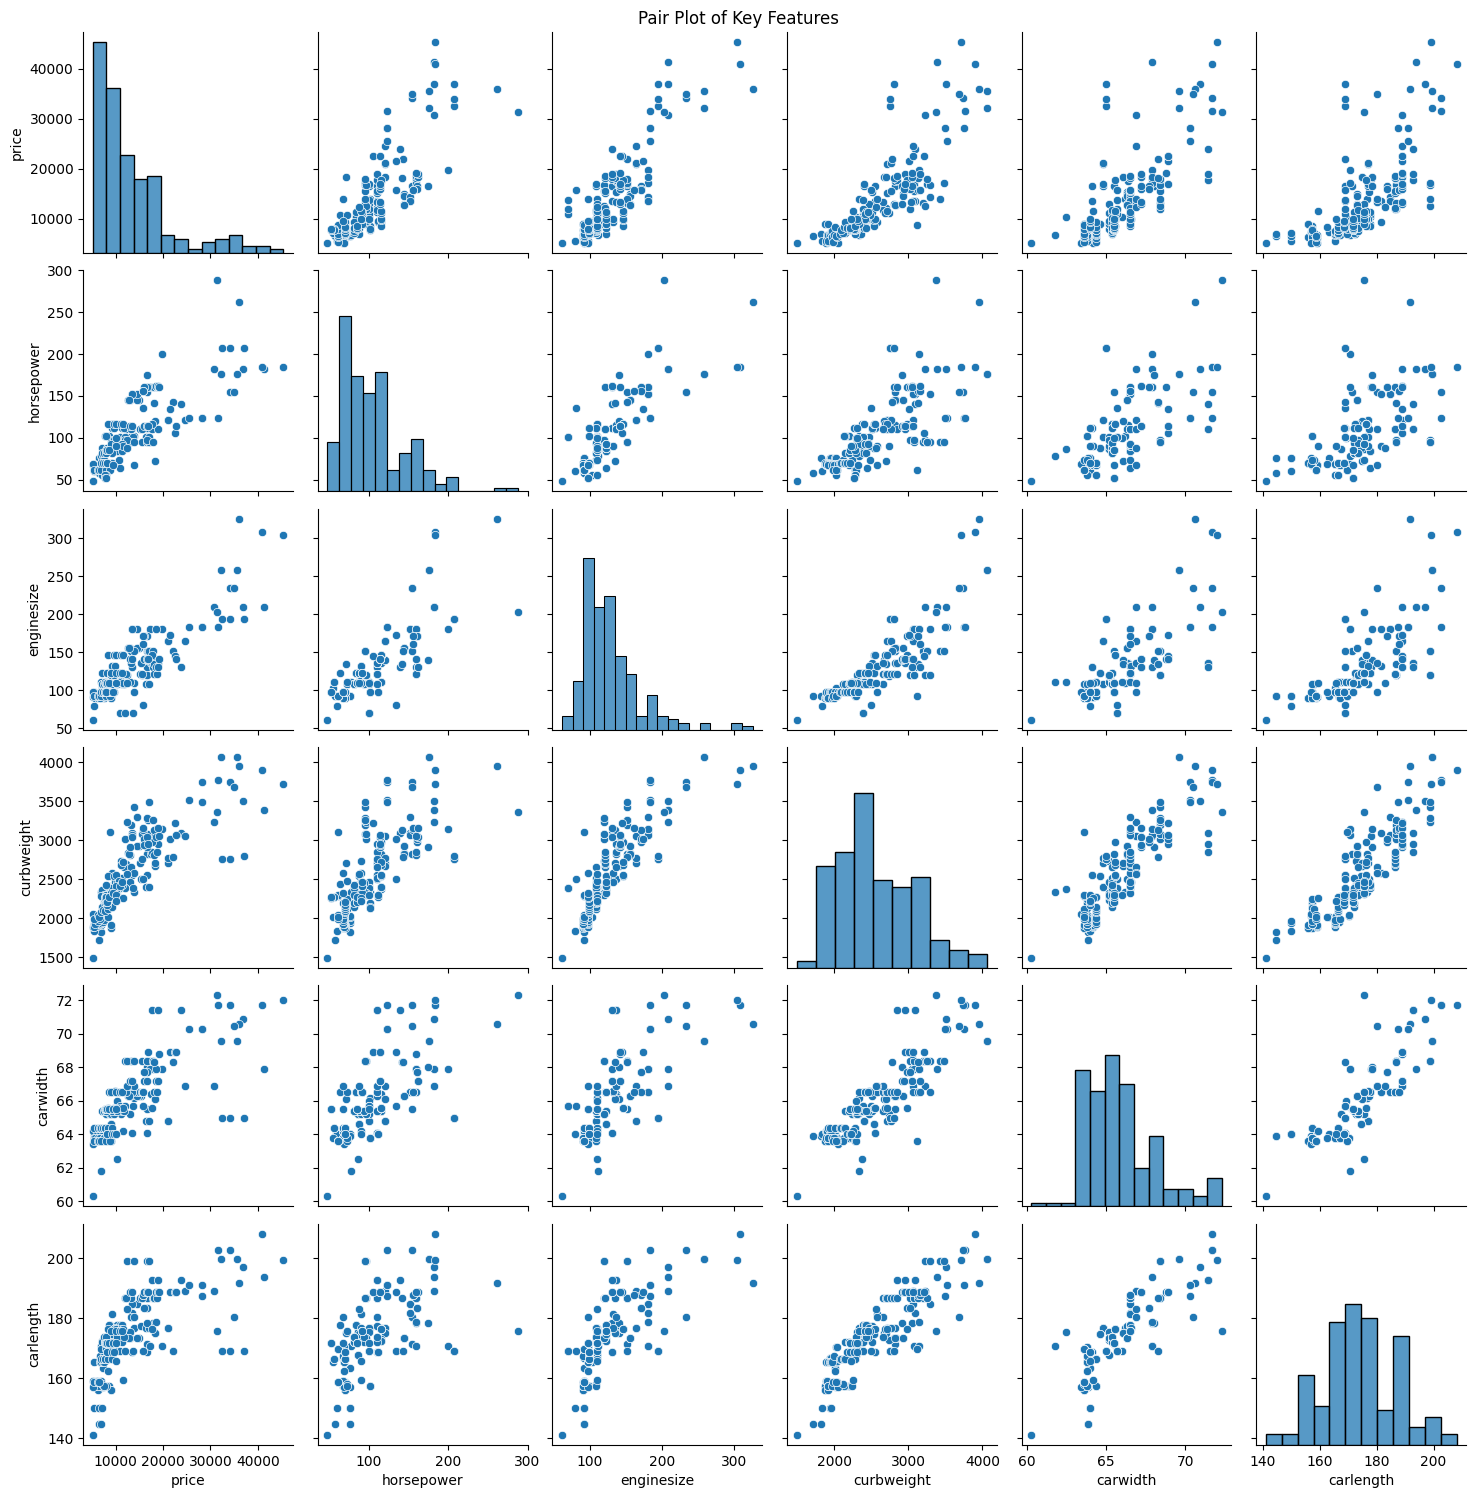

In [65]:
sns.pairplot(df[['price', 'horsepower', 'enginesize', 'curbweight', 'carwidth', 'carlength']])
plt.suptitle('Pair Plot of Key Features', y=1)
plt.show()

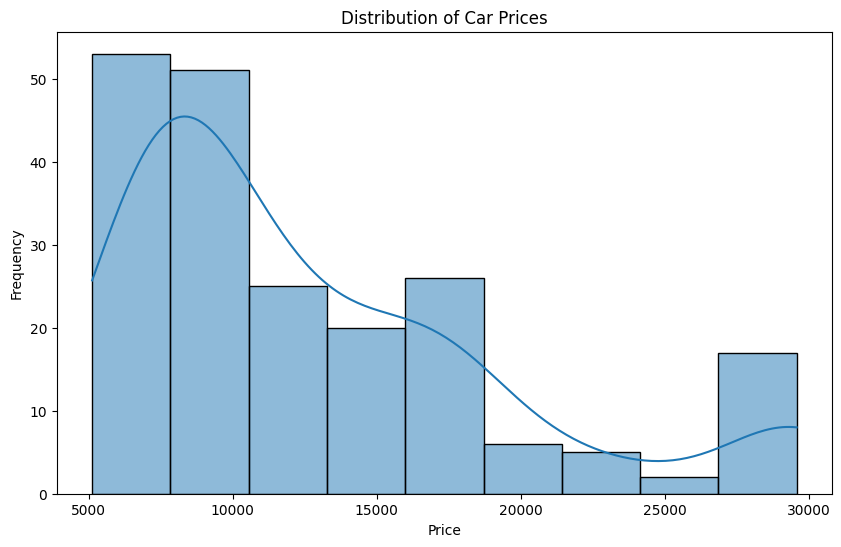

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df1, x='price', kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

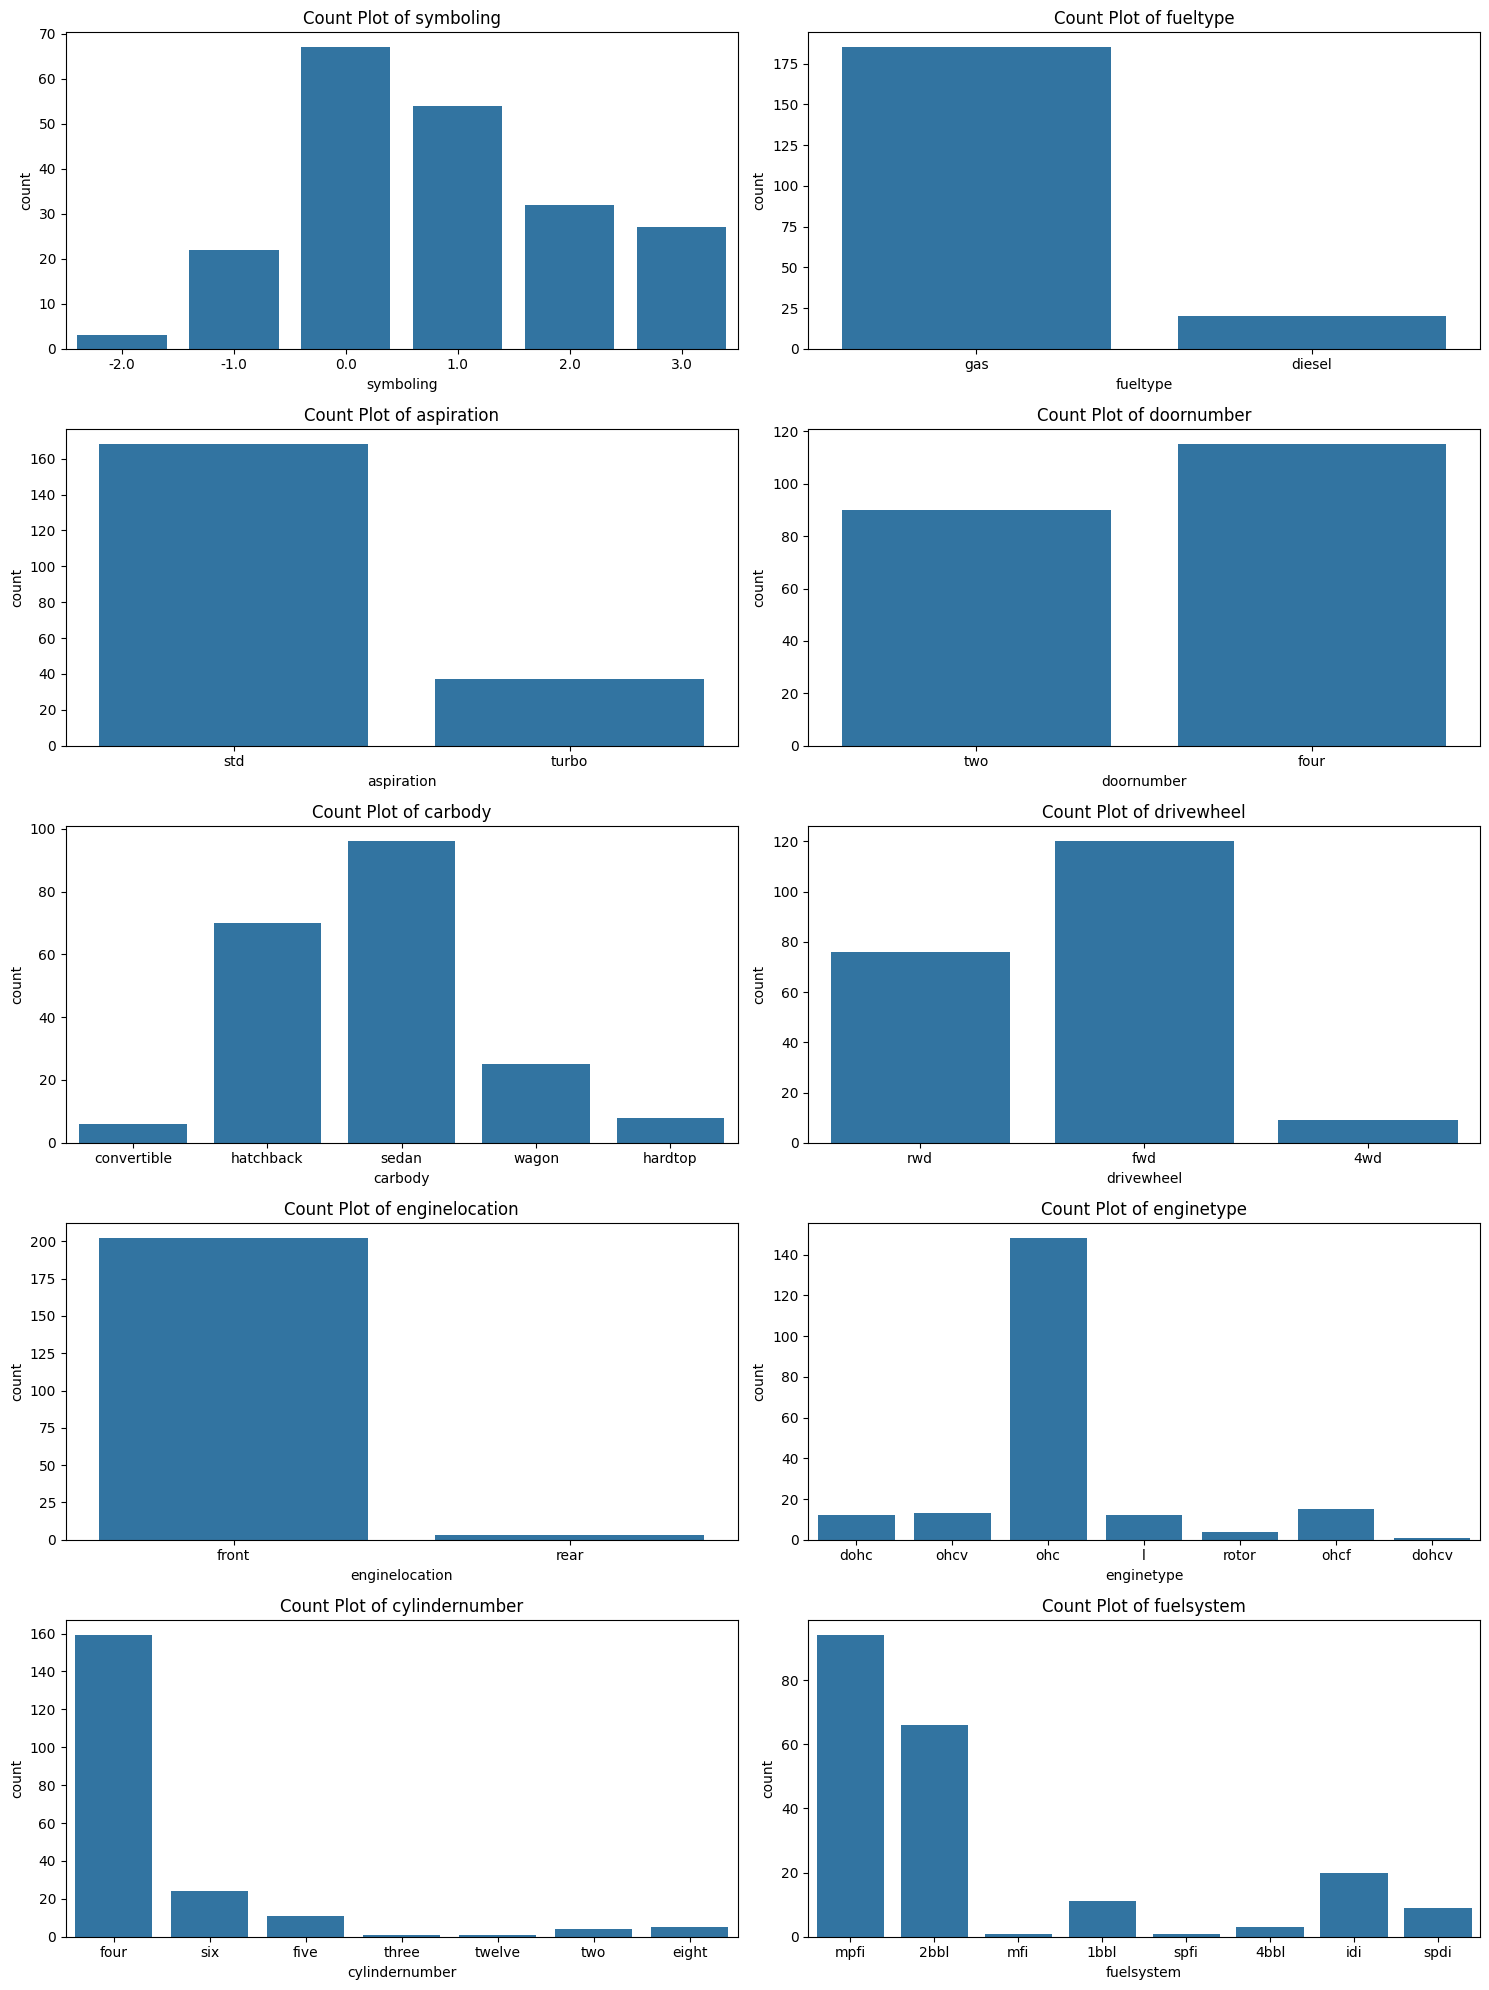

In [67]:
# Categorical columns you want to plot
categorical_columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(5,2,figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df1, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')

# Hide the empty subplots
for i in range(len(categorical_columns),10):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Label Encoding

In [75]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 975.2 kB/s eta 0:00:12
    --------------------------------------- 0.2/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.0 MB 1.8 MB/s


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [76]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

cols_to_encode = list(df1.select_dtypes(include=['object']))
cols_to_encode


#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label = df1.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    df_label[col] = label_encoder.fit_transform(df1[col])

print(df_label)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3.0         1           0           1        0           2   
1          3.0         1           0           1        0           2   
2          1.0         1           0           1        2           2   
3          2.0         1           0           0        3           1   
4          2.0         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200       -1.0         1           0           0        3           2   
201       -1.0         1           1           0        3           2   
202       -1.0         1           0           0        3           2   
203       -1.0         0           1           0        3           2   
204       -1.0         1           1           0        3           2   

     enginelocation  carwidth  carheight  enginetype  cylindernumber  \
0                 0      64.1       48.8           

### <font color='red'> FEATURE SCALING </font>

In [77]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns = ['carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df[numerical_columns])

# Transform the data
scaled_data = scaler.transform(df[numerical_columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Initialize a new DataFrame to store after applying MinMaxScaler
df_car = df_label.copy()

# Replace scaled columns in the original DataFrame
df_car[numerical_columns] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_car)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3.0         1           0           1        0           2   
1          3.0         1           0           1        0           2   
2          1.0         1           0           1        2           2   
3          2.0         1           0           0        3           1   
4          2.0         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200       -1.0         1           0           0        3           2   
201       -1.0         1           1           0        3           2   
202       -1.0         1           0           0        3           2   
203       -1.0         0           1           0        3           2   
204       -1.0         1           1           0        3           2   

     enginelocation  carwidth  carheight  enginetype  ...  fuelsystem  \
0                 0  0.316667   0.083333          

In [78]:
### <font color='red'>MODEL BUILDING</font>

#### DATA SPLITING

In [79]:
# Split dataset into features and target variable
x = df_car.drop('price', axis=1)
y = df_car['price']
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,carlength,enginesize
0,3.0,1,0,1,0,2,0,0.316667,0.083333,0,2,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.413433,0.260377
1,3.0,1,0,1,0,2,0,0.316667,0.083333,0,2,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.413433,0.260377
2,1.0,1,0,1,2,2,0,0.433333,0.383333,5,3,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.449254,0.343396
3,2.0,1,0,0,3,1,0,0.491667,0.541667,3,2,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.529851,0.181132
4,2.0,1,0,0,3,0,0,0.508333,0.541667,3,1,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.529851,0.283019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,1,0,0,3,2,0,0.716667,0.641667,3,2,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.711940,0.301887
201,-1.0,1,1,0,3,2,0,0.708333,0.641667,3,2,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.711940,0.301887
202,-1.0,1,0,0,3,2,0,0.716667,0.641667,5,3,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.711940,0.422642
203,-1.0,0,1,0,3,2,0,0.716667,0.641667,3,3,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.711940,0.316981


In [80]:
y

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

In [81]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### USE THIS TRAINING AND TESTING SETS IN VARIOUS REGRESSION ALGORITHMS 

### <font color='GREEN'>1.LINEAR REGRESSION </font>

In [82]:
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression()

In [83]:
#Train the model with the provided training data
LinearModel.fit(x_train,y_train)

LinearRegression()

In [84]:
Linear_PredictedTest = LinearModel.predict(x_test)
Linear_PredictedTest

array([ 0.49499805,  0.26291461,  0.13342794,  0.20428086,  0.49468894,
        0.02702151,  0.08150238,  0.0581712 ,  0.11504264,  0.06370652,
        0.28268678,  0.07024917,  0.26085086,  0.13313184,  0.85889545,
        0.05116737, -0.21822249,  0.22807047,  0.12798088,  0.13074424,
        0.15874511,  0.38888898,  0.05198375, -0.0914322 ,  0.03470959,
        0.47133797,  0.22857544,  0.2819995 ,  0.01532852,  0.29709904,
        0.50613162,  0.05777116,  0.00760072,  0.4777648 ,  0.07571818,
        0.51122549,  0.10970304,  0.1098383 ,  0.0012334 ,  0.22748547,
        0.08661551])

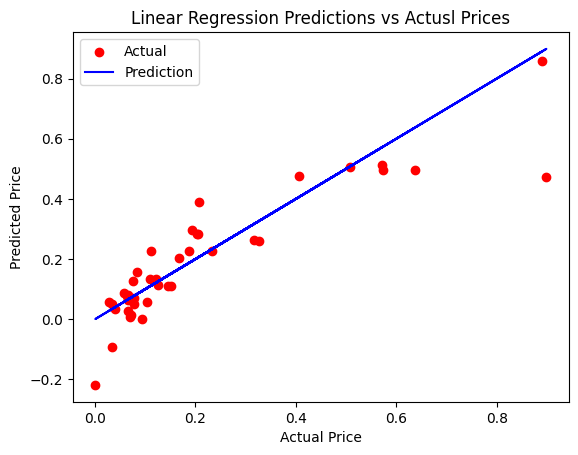

In [85]:
#Plot the actual target variable against the predicted values
plt.scatter(y_test, Linear_PredictedTest, color='red',label='Actual')
plt.plot(y_test,y_test,color='blue',label='Prediction') # Plot the prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Predictions vs Actusl Prices')
plt.legend()
plt.show()

#### EVALUATION OF MODEL


In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('Linear Regression')
MAE = mean_absolute_error(y_test,Linear_PredictedTest)
MSE = mean_squared_error(y_test,Linear_PredictedTest)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,Linear_PredictedTest)
print("Mean Absolute Error(MAE):",MAE)
print("Mean Squared Error(MSE):",MSE)
print ("rmse:",RMSE)
print("R Squared:",r2)

Linear Regression
Mean Absolute Error(MAE): 0.06378030311092989
Mean Squared Error(MSE): 0.00966311242708368
rmse: 0.09830113136217548
R Squared: 0.8013814349164737


In [87]:
# lr.score(x_test, y_test) calculates the R-squared score on the test data .
LinearModel.score(x_test,y_test)

0.8013814349164737

##### CROSS VALIDATION

In [88]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearModel,x_train,y_train,cv=5)
scores

array([0.82164283, 0.89161005, 0.84810405, 0.85070342, 0.85785095])

In [89]:
#Taking mean of the score
scores.mean()

0.8539822575252429

### <font color='GREEN'>2.DECISION TREE</font>

In [91]:
from sklearn.tree import DecisionTreeRegressor

#creating object for DecisionTree Regression class
DecisionTree = DecisionTreeRegressor(random_state=42)

In [92]:

#training the model with the provided training data
DecisionTree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [93]:
Decision_PredictedTest = DecisionTree.predict(x_test)
Decision_PredictedTest

array([0.78849114, 0.3061417 , 0.09510451, 0.25152674, 0.65741522,
       0.03028648, 0.00570975, 0.08011022, 0.09510451, 0.07142148,
       0.22707413, 0.07298545, 0.18981183, 0.15217715, 1.        ,
       0.03028648, 0.00697582, 0.24206842, 0.04644754, 0.10376843,
       0.12727769, 0.20805819, 0.03028648, 0.00570975, 0.06183903,
       0.78849114, 0.11682637, 0.28293034, 0.05538454, 0.2697731 ,
       0.65741522, 0.02758056, 0.09085944, 0.29112259, 0.07047813,
       0.65741522, 0.10329676, 0.18934015, 0.0942977 , 0.24206842,
       0.07186833])

#### EVALUATION OF MODEL

In [94]:
print("Decision Tree Regressor:")
mae=mean_absolute_error(y_test, Decision_PredictedTest)
mse=mean_squared_error(y_test, Decision_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Decision_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Decision Tree Regressor:
Mean Absolute Error(MAE): 0.044881249992431406
Mean Squared Error(MSE): 0.0038647669329397627
rmse: 0.06216724968132146
R Squared: 0.9205623997035062


In [95]:
DecisionTree.score(x_test,y_test)


0.9205623997035062

In [96]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTree,x_train,y_train, cv=5)
scores

array([0.87107647, 0.80322016, 0.55222351, 0.882919  , 0.89137802])

In [97]:
#Taking mean of the score
scores.mean()

0.8001634294164137

### <font color='GREEN'>3.RANDOM FOREST</font>

In [98]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)

In [99]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [100]:
Random_PredictedTest=random_forest.predict(x_test)
Random_PredictedTest

array([0.76343143, 0.33800209, 0.11467554, 0.22842974, 0.55454847,
       0.03170067, 0.06036195, 0.07287548, 0.14220049, 0.07317747,
       0.29011006, 0.05979073, 0.26930378, 0.14585592, 0.85130641,
       0.02783332, 0.00987662, 0.2288102 , 0.06435256, 0.13152227,
       0.13058703, 0.24495143, 0.03164038, 0.01807966, 0.05369309,
       0.76399074, 0.12583152, 0.28075915, 0.05441231, 0.28082717,
       0.55911127, 0.03133087, 0.0809364 , 0.34994398, 0.07397944,
       0.54903505, 0.1472706 , 0.19320557, 0.06718187, 0.2288102 ,
       0.08425277])

#### EVALUATION OF MODEL

In [101]:
print("Random Forest:")
mae=mean_absolute_error(y_test, Random_PredictedTest)
mse=mean_squared_error(y_test, Random_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Random_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Random Forest:
Mean Absolute Error(MAE): 0.03389142313242165
Mean Squared Error(MSE): 0.0021215584480138152
rmse: 0.04606037828778456
R Squared: 0.9563928394846888


In [102]:
random_forest.score(x_test,y_test)

0.9563928394846888

In [103]:
#Taking mean of the score
scores.mean()

0.8001634294164137

### <font color='GREEN'>4.GRADIENT BOOSTING REGRESSION</font>

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting = GradientBoostingRegressor(random_state=42)

In [105]:
GradientBoosting.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [106]:
Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest

array([ 0.75579507,  0.33812649,  0.10146861,  0.22449502,  0.65784331,
        0.04251996,  0.06228758,  0.05750125,  0.12743437,  0.06834895,
        0.28883811,  0.07052705,  0.29565266,  0.14308511,  0.9655874 ,
        0.02987326, -0.00460556,  0.21053252,  0.0566461 ,  0.11429854,
        0.12562659,  0.25051637,  0.01542885,  0.01603533,  0.03722484,
        0.75615829,  0.13272431,  0.28939339,  0.05078274,  0.28939339,
        0.67180226,  0.03523445,  0.07804115,  0.39844691,  0.0822764 ,
        0.63374052,  0.15222011,  0.19181364,  0.05595142,  0.21053252,
        0.08423005])

#### EVALUATION OF MODEL

In [108]:
print("Gradient Boosting Regressor:")
mae=mean_absolute_error(y_test, Gradient_PredictedTest)
mse=mean_squared_error(y_test, Gradient_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Gradient_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Gradient Boosting Regressor:
Mean Absolute Error(MAE): 0.03853078562281117
Mean Squared Error(MSE): 0.0030369505943271483
rmse: 0.05510853467773525
R Squared: 0.9375775896403532


In [109]:
GradientBoosting.score(x_test,y_test)

0.9375775896403532

In [110]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(GradientBoosting,x_train,y_train,cv=5)
scores

array([0.90719658, 0.93460825, 0.8414674 , 0.93518291, 0.88743735])

In [111]:
#Taking mean of the score
scores.mean()

0.9011784959537972

### <font color='GREEN'>5.SUPPORT VECTOR REGRESSION</font>

In [112]:
from sklearn.svm import SVR

In [113]:
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [114]:
svr_PredictedTest = svr_model.predict(x_test)
svr_PredictedTest

array([0.41622162, 0.30930335, 0.12965836, 0.22028372, 0.46077442,
       0.06427932, 0.1300292 , 0.09998915, 0.20219313, 0.07265072,
       0.26399846, 0.10910096, 0.29473149, 0.22310095, 0.73213515,
       0.06643021, 0.0659483 , 0.25026623, 0.10706574, 0.2047359 ,
       0.14077195, 0.32924342, 0.10334439, 0.0733315 , 0.05985139,
       0.42187774, 0.2821602 , 0.31037996, 0.08999031, 0.34447601,
       0.48385052, 0.07110861, 0.10267653, 0.45488868, 0.14639245,
       0.48092996, 0.19849253, 0.26712732, 0.07412237, 0.25056503,
       0.1644321 ])

#### EVALUATION OF MODEL

In [115]:

print("Support Vector Machine(SVM):")
mae=mean_absolute_error(y_test, svr_PredictedTest)
mse=mean_squared_error(y_test, svr_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,svr_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Support Vector Machine(SVM):
Mean Absolute Error(MAE): 0.07430120121882712
Mean Squared Error(MSE): 0.012045970310992943
rmse: 0.10975413573525575
R Squared: 0.7524034459640198


In [116]:
svr_model.score(x_test,y_test)

0.7524034459640198

In [117]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr_model ,x_train,y_train,cv=5)
scores

array([0.74617026, 0.72848727, 0.57700768, 0.67849157, 0.62861043])

In [118]:
#Taking mean of the score
scores.mean()

0.6717534443721428

### <font color='red'>CONCLUSION</font>

In [119]:
# Evaluation metrics result
evaluation_metrics = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest', 'Gradient Boosting Regressor', 'Support Vector Machine(SVM)'],
    'Mean Absolute Error (MAE)': [0.06378030311092989, 0.044881249992431406, 0.03389142313242165, 0.03853078562281117, 0.07430120121882712],
    'Mean Squared Error (MSE)': [0.00966311242708368, 0.0038647669329397627, 0.0021215584480138152, 0.0030369505943271483, 0.012045970310992943],
    'Root Mean Squared Error (RMSE)': [0.09830113136217548, 0.06216724968132146, 0.04606037828778456, 0.05510853467773525, 0.10975413573525575],
    'R Squared (R^2)':            [0.8013814349164737, 0.9205623997035062, 0.9563928394846888, 0.9375775896403532, 0.7524034459640198]
}

# Create DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
evaluation_df



,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R Squared (R^2)
0,Linear Regression,0.063780,0.009663,0.098301,0.801381
1,Decision Tree Regressor,0.044881,0.003865,0.062167,0.920562
2,Random Forest,0.033891,0.002122,0.046060,0.956393
3,Gradient Boosting Regressor,0.038531,0.003037,0.055109,0.937578
4,Support Vector Machine(SVM),0.074301,0.012046,0.109754,0.752403


1. **Linear Regression**: With an R-squared (R²) value around 0.80, it indicates that the model accounts for roughly 80% of the variance in the target variable. The Mean Squared Error (MSE) is quite low, showing that the model's predictions are generally close to the actual values. While this is a decent performance, there is room for improvement.

2. **Decision Tree Regressor**: This model achieves lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) compared to Linear Regression, indicating better accuracy. An R-squared (R²) value of around 0.92 means it explains about 92% of the variance in the target variable.

3. **Random Forest Regressor**: An R-squared (R²) value of approximately 0.95 indicates that it explains around 95% of the variance in the target variable, marking a significant enhancement. The Random Forest model further improves upon the Decision Tree Regressor, with even lower MSE and MAE values.

4. **Gradient Boosting Regressor**: The R-squared (R²) value of around 0.93 suggests that it explains about 93% of the variance in the target variable, closely matching the performance of the Random Forest. This model exhibits performance comparable to the Random Forest, with similarly low MSE and MAE values.

5. **Support Vector Regressor**: With an R-squared (R²) value of about 0.75, it explains only around 75% of the variance in the target variable, which is notably lower compared to the other models. The Support Vector Machine (SVM) model has the highest MSE and MAE among the evaluated models.

**In conclusion, Random Forest proves to be the best option for predicting the target variable in this dataset, followed closely by Gradient Boosting Regressor and Decision Tree Regressor. These ensemble methods offer exceptional predictive accuracy and robustness, making them ideal for real-world scenarios where precision is critical.**
